# Double pendulum using Lagrange's equation

Defines a DoublePendulum class that is used to generate double pendulum plots from solving Lagrange's equations.

Revised by Joe Huang

In [1]:
%matplotlib inline
import numpy as np
from scipy.integrate import odeint, solve_ivp
from IPython.display import Image
import matplotlib.pyplot as plt

In [2]:
Image(url='https://upload.wikimedia.org/wikipedia/commons/7/78/Double-Pendulum.svg')

## Euler-Lagrange equation

For a double pendulum, the Lagrangian with generalized coordinate $\phi_1$ and $\phi_2$ is

$\begin{align}
  \mathcal{L} = T - U = \frac12 (m_1 + m_2 ) L_1^2 \dot\phi_1^2 + m_2 L_1 L_2 \dot\phi_1 \dot\phi_2 \cos (\phi_1 - \phi_2)
  + \frac12 m_2 L_2^2 \dot\phi_2^2 + \cos \phi_1 L_1 (m_1 + m_2) g + \cos \phi_2 L_2 m_2 g
\end{align}$

The Euler-Lagrange equations are

$\begin{align}
 \frac{d}{dt}\frac{\partial\mathcal{L}}{\partial \dot\phi_1} = \frac{\partial\mathcal L}{\partial\phi_1}
 \quad\Longrightarrow\quad &
 (m_1 + m_2) L_1^2 \ddot \phi_1 + m_2 L_1 L_2 \ddot \phi_2 \cos(\phi_1 - \phi_2) -m_2 L_1 L_2 \dot\phi_2 \sin(\phi_1-\phi_2)(\dot\phi_1 - \dot \phi_2)\\
 &= -m_2 L_1 L_2 \dot\phi_1 \phi_2 \sin(\phi_1 - \phi_2) - (m_1 + m_2) L_1 g \sin\phi_1 \\
   \frac{d}{dt}\frac{\partial\mathcal{L}}{\partial \dot\phi_2} = \frac{\partial\mathcal L}{\partial\phi_2}
 \quad\Longrightarrow\quad &
 m_2 L_2^2 \ddot \phi_2 + m_2 L_1 L_2 \ddot \phi_1 \cos(\phi_1 - \phi_2) -m_2 L_1 L_2 \dot\phi_1 \sin(\phi_1-\phi_2)(\dot\phi_1 - \dot \phi_2)\\
 &= m_2 L_1 L_2 \dot\phi_1 \phi_2 \sin(\phi_1 - \phi_2) - m_2 L_2 g \sin\phi_2.
\end{align}$


In [3]:
# The dpi (dots-per-inch) setting will affect the resolution and how large
#  the plots appear on screen and printed.  So you may want/need to adjust 
#  the figsize when creating the figure.
plt.rcParams['figure.dpi'] = 100.    # this is the default for notebook

# Change the common font size (smaller when higher dpi)
font_size = 10
plt.rcParams.update({'font.size': font_size})

## Pendulum class and utility functions

In [4]:
class DoublePendulum():
    """
    Pendulum class implements the parameters and Lagrange's equations for 
     a simple pendulum (no driving or damping).
     
    Parameters
    ----------
    
    L1 : float
        length of the Upper pendulum
    L2 : float
        length of the lower pendulum
    g : float
        gravitational acceleration at the earth's surface 
    m1 : float
        mass of upper pendulum
    m2 : float
        mass of lower pendulum    

    Methods
    -------
    dy_dt(t, y)
        Returns the right side of the differential equation in vector y, 
        given time t and the corresponding value of y.
    """
    def __init__(self, L1=1.,L2=1., m1=1., m2=1., g=1.
                ):
        self.L1 = L1
        self.L2 = L2
        self.m1 = m1
        self.m2 = m2
        self.g = g
    
    def dy_dt(self, t, y):
        """
        This function returns the right-hand side of the diffeq: 
        [dphi_1/dt d^2phi_1/dt^2 dphi_2/dt d^2phi_2/dt^2]
        
        Parameters
        ----------
        t : float
            time 
        y : float
            A 4-component vector with y[0] = phi_1(t) y[1] = dphi_1/dt y[2]=phi_2(t) y[3] = dphi_2(t)
            
        Returns
        -------
        
        """
        return [y[1], (-self.g * (2.*self.m1+ self.m2)*np.sin(y[0])-self.m2*self.g*np.sin(y[0]-2*y[2])\
                       -2.*np.sin(y[0]-y[2])*self.m2*(y[3]**2*self.L2+y[1]**2 * self.L1 * np.cos(y[0]-y[2])))\
                /(self.L1 * (2.*self.m1 + self.m2 - self.m2*np.cos(2*y[0]-2*y[2]))), y[3],\
                (2*np.sin(y[0]-y[2])*((y[1]**2)*self.L1* (self.m1+ self.m2)+(self.m1+ self.m2)*self.g *np.cos(y[0])\
                                       +y[3]**2*self.L2*self.m2*np.cos(y[0]-y[2]))) \
                / (self.L2 * (2.*self.m1 +self.m2 - self.m2*np.cos(2*y[0]-2*y[2])))]
    
    def solve_ode(self, t_pts, phi_1_0, phi_1_dot_0, phi_2_0,phi_2_dot_0,
                  abserr=1.0e-9, relerr=1.0e-9):
        """
        Solve the ODE given initial conditions.
        Specify smaller abserr and relerr to get more precision.
        """
        y = [phi_1_0, phi_1_dot_0, phi_2_0, phi_2_dot_0] 
        solution = solve_ivp(self.dy_dt, (t_pts[0], t_pts[-1]), 
                             y, t_eval=t_pts, 
                             atol=abserr, rtol=relerr)
        phi_1, phi_1_dot,phi_2,phi_2_dot = solution.y

        return phi_1, phi_1_dot, phi_2, phi_2_dot

## Make simple pendulum plots 

In [5]:
# Labels for individual plot axes
phi_1_vs_time_labels = (r'$t$', r'$\phi_1(t)$')
phi_2_vs_time_labels = (r'$t$', r'$\phi_2(t)$')
phi_1_dot_vs_time_labels = (r'$t$', r'$d\phi_1/dt(t)$')
phi_2_dot_vs_time_labels = (r'$t$', r'$d\phi_2/dt(t)$')
state_space_labels = (r'$\phi$', r'$d\phi/dt$')

# Common plotting time (generate the full time then use slices)
t_start = 0.
t_end = 250.
delta_t = 0.001

t_pts = np.arange(t_start, t_end+delta_t, delta_t)  

L1 = 1.
L2 = 1.
m1 = 1.
m2 = 1.
g = 1.

# Instantiate a pendulum 
p1 = DoublePendulum(L1=L1,L2=L2, m1=m1, m2=m2, g=g)


C:\Users\jozy9\anaconda3\lib\site-packages\IPython\core\pylabtools.py:132: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


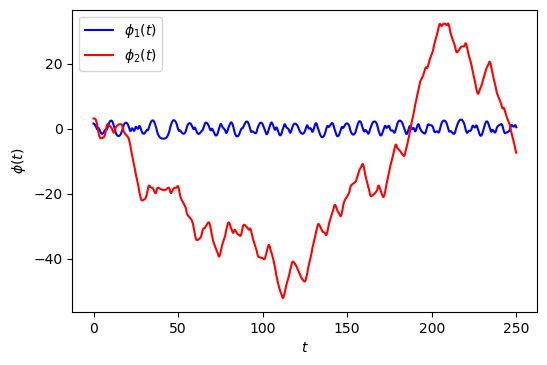

In [6]:
phi_1_0 = np.pi/2
phi_1_dot_0 = 0.
phi_2_0 = np.pi
phi_2_dot_0 = 0.
phi_1, phi_1_dot, phi_2, phi_2_dot = p1.solve_ode(t_pts, phi_1_0, phi_1_dot_0,phi_2_0,phi_2_dot_0)

plt.subplot(1,1,1)
plt.plot(t_pts,phi_1,'b',label='$\phi_1(t)$')
plt.ylabel('$\phi_1(t)$')
plt.plot(t_pts,phi_2,'r',label='$\phi_2(t)$')
plt.xlabel('$t$')
plt.ylabel('$\phi(t)$')
plt.legend()
plt.show()

(b) To show chaos, I will use two different inital values. The two double pendulums have the same speed and are seperated by 0.1 radian. We see after a long time, the differences of $\phi_1$ and $\phi_2$ do not converge to 0. Therefore, it implies chaos.

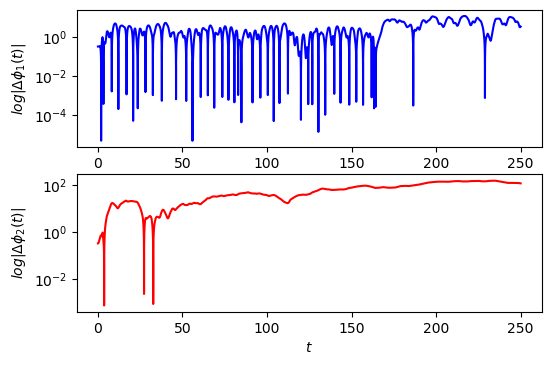

In [7]:
phi_3_0 = np.pi/2 + 0.1*np.pi
phi_3_dot_0 = 0.
phi_4_0 = np.pi + 0.1*np.pi
phi_4_dot_0 = 0.

phi_3, phi_3_dot, phi_4, phi_4_dot = p1.solve_ode(t_pts, phi_3_0, phi_3_dot_0,phi_4_0,phi_4_dot_0)

plt.subplot(2,1,1)
plt.semilogy(t_pts,np.absolute(phi_3-phi_1),'b')
plt.ylabel('$log|\Delta\phi_1(t)|$')

plt.subplot(2,1,2)
plt.semilogy(t_pts,np.absolute(phi_4-phi_2),'r')
plt.xlabel('$t$')
plt.ylabel('$log|\Delta\phi_2(t)|$')
plt.show()

In [8]:
# Import the widgets we will use (add more as needed!) 
import ipywidgets as widgets
from ipywidgets import HBox, VBox, Layout, Tab, Label, Checkbox
from ipywidgets import FloatSlider, IntSlider, Play, Dropdown, HTMLMath 

from IPython.display import display
from time import sleep

In [9]:
def plot_y_vs_x(x, y, axis_labels=None, label=None, title=None, 
                color=None, linestyle=None, ax=None):
    """
    Generic plotting function: return a figure axis with a plot of y vs. x,
    with line color and style, title, axis labels, and line label
    """
    if ax is None:        # if the axis object doesn't exist, make one
        ax = plt.gca()

    line, = ax.plot(x, y, label=label, color=color, linestyle=linestyle)
    if label is not None:    # if a label if passed, show the legend
        ax.legend()
    if title is not None:    # set a title if one if passed
        ax.set_title(title)
    if axis_labels is not None:  # set x-axis and y-axis labels if passed  
        ax.set_xlabel(axis_labels[0])
        ax.set_ylabel(axis_labels[1])

    return ax, line

In [10]:
# This function generates the main output, which is a grid of plots
def pendulum_plots(phi_vs_time_plot_1=True, phi_vs_time_plot_2=True, 
                   phi_dot_vs_time_plot_1=True, phi_dot_vs_time_plot_2=True,
                   state_space_plot_1=True, state_space_plot_2=True,
                   L1=1.,L2=1., m1=1., m2=1., g=1., phi_1_0=np.pi/2, 
                   phi_1_dot_0=0., phi_2_0=np.pi, phi_2_dot_0=0.,
                   t_start=0, t_end=100, delta_t=0.1, plot_start=0,
                   font_size=18):
    """
    Create plots for interactive_output according to the inputs.
    
    Based on generating a Pendulum instance and the requested graphs.
    
    Notes
    -----
        1. We generate a new Pendulum instance every time *and* solved
            the ODE every time, even if the only change is to parameters
            like t_start and t_end.  Should we care or is this just so
            cheap to recalculate that it doesn't matter?
            How could we structure this differently?
    """
    
    # add delta_t o it goes at least to t_end (probably should use linspace)
    t_pts = np.arange(t_start, t_end+delta_t, delta_t)  
        
    # Instantiate a pendulum with the passed (or default) values of the 
    #  natural frequency omega_0, damping beta, driving amplitude, frequency, 
    #  and phase (f_ext, omega_ext, phi_ext).
    #  Should we delete p1 at some point?  Is there a memory issue?
    p2 = DoublePendulum(L1=L1,L2=L2, m1=m1, m2=m2, g=g)
    y0 = [phi_1_0, phi_1_dot_0, phi_2_dot_0, phi_2_dot_0]  # initial conditions for the pendulum ODE

    # ODE solver parameters
    abserr = 1.0e-8
    relerr = 1.0e-6

    # For now we solve with odeint; give more options in the future.
    phi_1, phi_1_dot, phi_2, phi_2_dot = p2.solve_ode(t_pts, phi_1_0, phi_1_dot_0, phi_2_0,
                                                      phi_2_dot_0, abserr, relerr)
    
    
    # Update the common font size
    plt.rcParams.update({'font.size': font_size})
 
    # Labels for individual plot axes
    phi_vs_time_labels = (r'$t$', r'$\phi$')
    phi_dot_vs_time_labels = (r'$t$', r'$d\phi/dt$')
    state_space_labels = (r'$\phi$', r'$d\phi/dt$')
    
    # Figure out how many rows and columns [one row for now]
    plot_flags = [phi_vs_time_plot_1, phi_dot_vs_time_plot_1, state_space_plot_1,
                 phi_vs_time_plot_2, phi_dot_vs_time_plot_2, state_space_plot_2]
    plot_num_1 = plot_flags.count(True)
    plot_num = plot_num_1 / 2.
    plot_rows = 2
    figsize_rows = plot_rows*6
    plot_cols = 3
    figsize_cols = min(plot_cols*8, 16)  # at most 16

    # Make the plot!
    fig = plt.figure(figsize=(16,figsize_rows))
                             
    # finds nearest index to plot_start in t_pts array                      
    start_index = (np.fabs(t_pts-plot_start)).argmin() 
    
    next_axis = 1  # keep track of the axis number
    
    if phi_vs_time_plot_1:
        ax_phi = fig.add_subplot(plot_rows, plot_cols, next_axis)                  
        plot_y_vs_x(t_pts, phi_1, axis_labels=phi_vs_time_labels, 
                    label='Doublependulum1', title=r'$\phi_1$ vs. time', 
                    ax=ax_phi)    
        # add a line where the phase space plot starts
        ax_phi.axvline(t_pts[start_index], lw=3, color='red')
        
    next_axis += 1
        
    if phi_vs_time_plot_2:
        ax_phi = fig.add_subplot(plot_rows, plot_cols, next_axis)                  
        plot_y_vs_x(t_pts, phi_2, axis_labels=phi_vs_time_labels, 
                    label='Doublependulum2', title=r'$\phi_2$ vs. time', 
                    ax=ax_phi)    
        # add a line where the phase space plot starts
        ax_phi.axvline(t_pts[start_index], lw=3, color='red')
        
    next_axis += 1
                          
    
    if phi_dot_vs_time_plot_1:
        ax_phi_dot = fig.add_subplot(plot_rows, plot_cols, next_axis)                  
        plot_y_vs_x(t_pts, phi_1_dot, axis_labels=phi_dot_vs_time_labels, 
                    label='oscillator1', title=r'$dq1/dt$ vs. time', 
                    ax=ax_phi_dot)    
        # add a line where the phase space plot starts
        ax_phi_dot.axvline(t_pts[start_index], lw=3, color='red')
        
    next_axis += 1
    
    if phi_dot_vs_time_plot_2:
        ax_phi_dot = fig.add_subplot(plot_rows, plot_cols, next_axis)                  
        plot_y_vs_x(t_pts, phi_2_dot, axis_labels=phi_dot_vs_time_labels, 
                    label='oscillator2', title=r'$dq2/dt$ vs. time', 
                    ax=ax_phi_dot)    
        # add a line where the phase space plot starts
        ax_phi_dot.axvline(t_pts[start_index], lw=3, color='red')
        
    next_axis += 1
                          

    if state_space_plot_1:
        ax_state_space = fig.add_subplot(plot_rows, plot_cols, next_axis)                  
        plot_y_vs_x(phi_1[start_index:-1], phi_1_dot[start_index:-1], 
                    axis_labels=state_space_labels, title='State space1', 
                    ax=ax_state_space)    
    next_axis += 1
    
    if state_space_plot_2:
        ax_state_space = fig.add_subplot(plot_rows, plot_cols, next_axis)                  
        plot_y_vs_x(phi_2[start_index:-1], phi_2_dot[start_index:-1], 
                    axis_labels=state_space_labels, title='State space2', 
                    ax=ax_state_space)    
    next_axis += 1
    
    fig.tight_layout()
    
    return fig



In [11]:
# Widgets for the various inputs.
#   For any widget, we can set continuous_update=False if we don't want the 
#    plots to shift until the selection is finished (particularly relevant for 
#    sliders).

# Widgets for the plot choice (plus a label out front)
plot_choice_w = Label(value='Which plots: ',layout=Layout(width='100px'))
def plot_choice_widget(on=True, plot_description=None):
    """Makes a Checkbox to select whether to show a plot."""
    return Checkbox(value=on, description=plot_description,
                  disabled=False, indent=False, layout=Layout(width='150px'))
phi_1_vs_time_plot_w = plot_choice_widget(True, r'$\phi_1$ vs. time')
phi_2_vs_time_plot_w = plot_choice_widget(True, r'$\phi_2$ vs. time')
phi_1_dot_vs_time_plot_w = plot_choice_widget(False, r'$d\phi_1/dt$ vs. time')
phi_2_dot_vs_time_plot_w = plot_choice_widget(False, r'$d\phi_2/dt$ vs. time')
state_space_1_plot_w = plot_choice_widget(True, 'state space1')
state_space_2_plot_w = plot_choice_widget(True, 'state space2')

# Widgets for the pendulum parameters (all use FloatSlider, so made function)
def float_widget(value, min, max, step, description, format):
    """Makes a FloatSlider with the passed parameters and continuous_update
       set to False."""
    slider_border = Layout(border='solid 1.0px')
    return FloatSlider(value=value,min=min,max=max,step=step,disabled=False,
                       description=description,continuous_update=False,
                       orientation='horizontal',layout=slider_border,
                       readout=True,readout_format=format)

L1_w = float_widget(value=1.0, min=0.1, max=10., step=0.1,
                         description=r'length of pendulum 1', format='.1f')
L2_w = float_widget(value=1.0, min=0.1, max=10., step=0.1,
                         description=r'length of pendulum 2', format='.1f')
m1_w = float_widget(value=1.0, min=0.1, max=10., step=0.1,
                         description=r'mass of pendulum 1', format='.1f')
m2_w = float_widget(value=1.0, min=0.1, max=10., step=0.1,
                         description=r'mass of pendulum 2', format='.1f')

# Widgets for the initial conditions
phi_1_0_w = float_widget(value=np.pi/2, min=0., max=2.*np.pi, step=0.1,
                        description=r'$\phi_1_0$:', format='.1f')
phi_2_0_w = float_widget(value=np.pi, min=0., max=2.*np.pi, step=0.1,
                        description=r'$\phi_2_0$:', format='.1f')
phi_1_dot_0_w = float_widget(value=0.0, min=-10., max=10., step=0.1,
                            description=r'$(d\phi_1/dt)_0$:', format='.1f')
phi_2_dot_0_w = float_widget(value=0.0, min=-10., max=10., step=0.1,
                            description=r'$(d\phi_2/dt)_0$:', format='.1f')

# Widgets for the plotting parameters
t_start_w = float_widget(value=0., min=0., max=100., step=10.,
                         description='t start:', format='.1f') 
t_end_w = float_widget(value=100., min=0., max=500., step=10.,
                       description='t end:', format='.1f')
delta_t_w = float_widget(value=0.1, min=0.01, max=0.2, step=0.01,
                         description='delta t:', format='.2f')
plot_start_w = float_widget(value=0., min=0., max=300., step=5.,
                            description='start plotting:', format='.1f')

# Widgets for the styling parameters
font_size_w = Dropdown(options=['12', '16', '18', '20', '24'], value='18',
                       description='Font size:',disabled=False,
                       continuous_update=False,layout=Layout(width='140px'))


############## Begin: Explicit callback functions #######################

# Make sure that t_end is at least t_start + 50
def update_t_end(*args):
    if t_end_w.value < t_start_w.value:
        t_end_w.value = t_start_w.value + 50     
t_end_w.observe(update_t_end, 'value')
t_start_w.observe(update_t_end, 'value')


# Make sure that plot_start is at least t_start and less than t_end
def update_plot_start(*args):
    if plot_start_w.value < t_start_w.value:
        plot_start_w.value = t_start_w.value
    if plot_start_w.value > t_end_w.value:
        plot_start_w.value = t_end_w.value
plot_start_w.observe(update_plot_start, 'value')
t_start_w.observe(update_plot_start, 'value')
t_end_w.observe(update_plot_start, 'value')


############## End: Explicit callback functions #######################

# Set up the interactive_output widget 
plot_out = widgets.interactive_output(pendulum_plots,
                          dict(
                          phi_vs_time_plot_1=phi_1_vs_time_plot_w,
                          phi_vs_time_plot_2=phi_2_vs_time_plot_w,
                          phi_dot_vs_time_plot_1=phi_1_dot_vs_time_plot_w,
                          phi_dot_vs_time_plot_2=phi_2_dot_vs_time_plot_w,
                          state_space_plot_1=state_space_1_plot_w,
                          state_space_plot_2=state_space_2_plot_w,
                          L1=L1_w,
                          L2=L2_w,
                          m1=m1_w,
                          m2=m2_w,
                          phi_1_0=phi_1_0_w, 
                          phi_1_dot_0=phi_1_dot_0_w, 
                          phi_2_0=phi_2_0_w, 
                          phi_2_dot_0=phi_2_dot_0_w,
                          t_start=t_start_w, 
                          t_end=t_end_w,
                          delta_t=delta_t_w, 
                          plot_start=plot_start_w,
                          font_size=font_size_w)
                        )

# Now do some manual layout, where we can put the plot anywhere using plot_out
hbox1 = HBox([plot_choice_w, phi_1_vs_time_plot_w, phi_2_vs_time_plot_w, 
              phi_1_dot_vs_time_plot_w, phi_2_dot_vs_time_plot_w,
              state_space_1_plot_w, state_space_2_plot_w]) #  choice of what plots 
                                      
hbox2 = HBox([phi_1_0_w,phi_1_dot_0_w, phi_2_0_w,phi_2_dot_0_w]) # initial conditions and damping
hbox3 = HBox([t_start_w, t_end_w, delta_t_w, plot_start_w]) # time and plot ranges
hbox4 = HBox([font_size_w]) # font size

# We'll set up Tabs to organize the controls.  The Tab contents are declared
#  as tab0, tab1, ... (probably should make this a list?) and the overall Tab
#  is called tab (so its children are tab0, tab1, ...).
tab_height = '70px'  # Fixed minimum height for all tabs. Specify another way?
tab0 = VBox([hbox2], layout=Layout(min_height=tab_height))
tab1 = VBox([hbox1, hbox3],layout=Layout(min_height=tab_height))
tab2 = VBox([hbox4], layout=Layout(min_height=tab_height))

tab = Tab(children=[tab0, tab1, tab2])
tab.set_title(0, 'Physics')
tab.set_title(1, 'Plotting')
tab.set_title(2, 'Styling')

# Release the Kraken!
vbox2 = VBox([tab, plot_out])
display(vbox2)